# Digital Modulation

As a short Python example, let’s generate QPSK at baseband and plot the constellation.

Even though we could generate the complex symbols directly, let’s start from the knowledge that QPSK has four symbols at 90-degree intervals around the unit circle. We will use 45, 135, 225, and 315 degrees for our points. First we will generate random numbers between 0 and 3 and perform math to get the degrees we want before converting to radians.

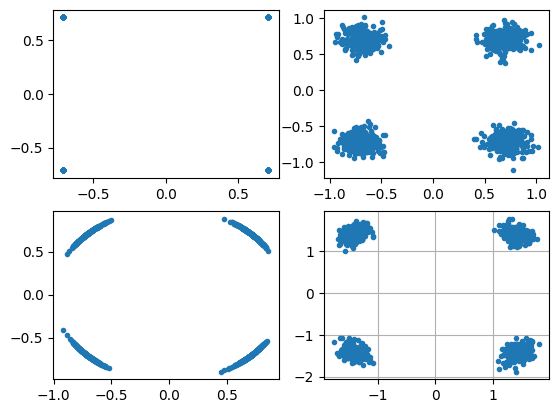

In [1]:
import numpy as np
import matplotlib.pyplot as plt

num_symbols = 1000

x_int  = np.random.randint(0, 4, num_symbols)
x_degrees = x_int*90 + 45
x_radians = x_degrees*(np.pi/180)
# Derive rectangular coordinates from polar
x_symbols = np.cos(x_radians)+1j*np.sin(x_radians) 
fig, axs = plt.subplots(2,2)
axs[0, 0].plot(np.real(x_symbols), np.imag(x_symbols), '.')
plt.grid(True)

# Observe how all the symbols we generated overlap. 
# There’s no noise so the symbols all have the same value. Let’s add some noise:
noise = np.random.randn(num_symbols) + 1j*np.random.randn(num_symbols)
noise_pwr = 0.01
r1 = x_symbols + noise * np.sqrt(noise_pwr)
axs[0, 1].plot(np.real(r1), np.imag(r1), '.')
plt.grid(True)

# For those interested in simulating phase noise, which could result 
# from phase jitter within the local oscillator (LO), replace the r with:
phase_noise = np.random.randn(len(x_symbols)) * 0.1 # adjust multiplier for "strength" of phase noise
r2 = x_symbols * np.exp(1j*phase_noise)
axs[1, 0].plot(np.real(r2), np.imag(r2), '.')
plt.grid(True)

# This was to test if r_test == r2. It's TRUE, which means
# numpy is smart enough to do the conversion in the background
x_sym_rho = np.abs(x_symbols)
x_sym_phi = np.arctan2(np.imag(x_symbols), np.real(x_symbols))
r_test = (x_sym_rho*np.exp(1j*x_sym_phi)) * np.exp(1j*phase_noise)

# You could even combine phase noise 
# with AWGN to get the full experience:
r = r1 + r2
axs[1, 1].plot(np.real(r), np.imag(r), '.')
plt.grid(True)
plt.show()
